### Figure 10,11 for Siddiqui et al 

#### P-E contribution

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/'

ds_salt_anom_adv_decomp_Iceland_200 = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_iceland_200.nc')
ds_salt_anom_adv_decomp_SPNA_200 = xr.open_dataset(data_dir+'ds_salt_anom_adv_decomp_SPNA_200.nc')

ds_SPNA_anom = xr.open_dataset(data_dir+'SPNA_basin_anom_budgS_200_ts.nc')
ds_iceland_anom = xr.open_dataset(data_dir+'iceland_basin_anom_budgS_200_ts(1).nc')

ds_SPNA_anom1000 = xr.open_dataset(data_dir+'depths_balance/SPNA/ds_SPNA_adv_diff_29.nc')
ds_iceland_anom1000 = xr.open_dataset(data_dir+'depths_balance/Iceland_basin/ds_IB_adv_diff_29.nc')


ds_mxld_spna = xr.open_dataset(data_dir+'eccov4r4_mxld_spna.nc')
ds_mxld_iceland_basin = xr.open_dataset(data_dir+'eccov4r4_mxld_iceland_basin.nc')

In [5]:
ds_vol_anom_IB200 = xr.open_dataset(data_dir+'IB_vol_anom_budg_200.nc')
ds_vol_anom_IB1000 = xr.open_dataset(data_dir+'IB_vol_anom_budg_1000.nc')
ds_vol_anom_IB_fulldepth = xr.open_dataset(data_dir+'IB_vol_anom_budg_full_depth.nc')

ds_vol_anom_SPNA200 = xr.open_dataset(data_dir+'SPNA_vol_anom_budg_200.nc')
ds_vol_anom_SPNA1000 = xr.open_dataset(data_dir+'SPNA_vol_anom_budg_1000.nc')
ds_vol_anom_SPNA_fulldepth = xr.open_dataset(data_dir+'SPNA_vol_anom_budg_full_depth.nc')



In [6]:
ds_vol_anom_IB200

<xarray.Dataset>
Dimensions:  (time: 310)
Coordinates:
    dt       (time) float64 ...
  * time     (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month    (time) int64 ...
Data variables:
    V_tnd    (time) float64 ...
    V_frc    (time) float64 ...
    V_adv    (time) float64 ...

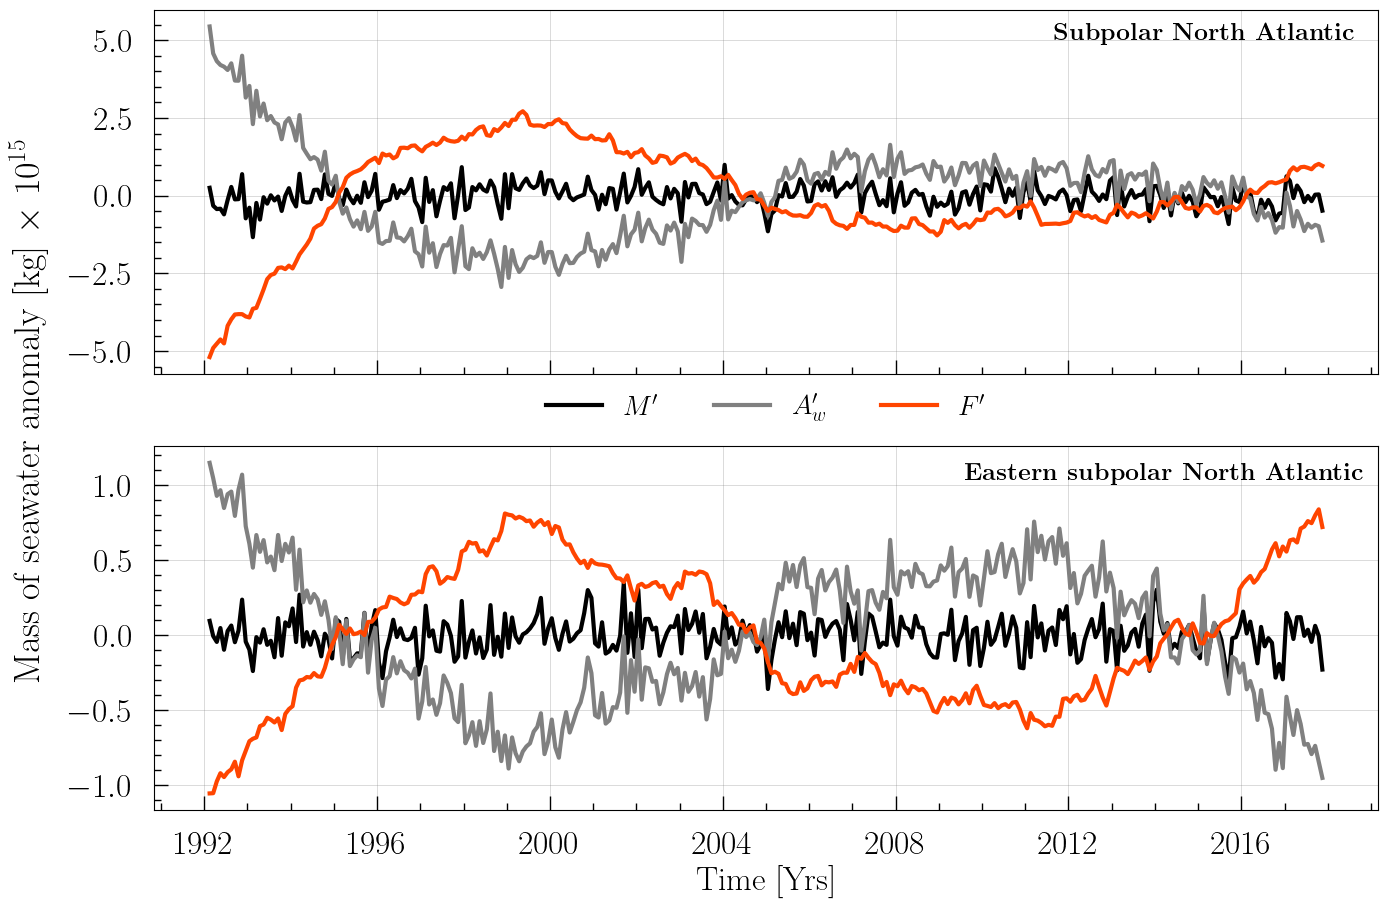

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ds_vol_anom_SPNA1000.time, ds_vol_anom_SPNA1000.V_tnd*1e-15, lw=3, color='black',label=r'$M^\prime $')
axs[0].plot(ds_vol_anom_SPNA1000.time, ds_vol_anom_SPNA1000.V_adv*1e-15, lw=3, color='grey',label=r'$A^\prime _{w} $')
axs[0].plot(ds_vol_anom_SPNA1000.time, ds_vol_anom_SPNA1000.V_frc*1e-15, lw=3, color='orangered',label=r'$F^\prime$')

#plt.ylim([-0.8,0.8])
axs[0].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.3, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'Mass of seawater anomaly [kg] $\times$ 10$^{15}$', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ds_vol_anom_IB1000.time, ds_vol_anom_IB1000.V_tnd*1e-15, lw=3, color='black',label=r'Seawater anomaly')
axs[1].plot(ds_vol_anom_IB1000.time, ds_vol_anom_IB1000.V_adv*1e-15, lw=3, color='grey',label=r'Advection')
axs[1].plot(ds_vol_anom_IB1000.time, ds_vol_anom_IB1000.V_frc*1e-15, lw=3, color='orangered',label=r'P-E+R')

#axs[1].set_ylim([-0.5,0.5])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)

# axs[0].axvspan(xmin='1992-01',xmax='1995-03',color='blue',alpha=0.1)
# axs[0].axvspan(xmin='1995-03',xmax='1998-08',color='orange',alpha=0.1)
# axs[0].axvspan(xmin='1998-08',xmax='1999-04',color='blue',alpha=0.1)
# axs[0].axvspan(xmin='1999-04',xmax='2007-01',color='orange',alpha=0.1)
# axs[0].axvspan(xmin='2007-01',xmax='2010-01',color='blue',alpha=0.1)
# axs[0].axvspan(xmin='2010-01',xmax='2011-12',color='orange',alpha=0.1)
# axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)


# axs[1].axvspan(xmin='1992-01',xmax='1995-03',color='blue',alpha=0.1)
# axs[1].axvspan(xmin='1995-03',xmax='1998-08',color='orange',alpha=0.1)
# axs[1].axvspan(xmin='1998-08',xmax='2000-01',color='blue',alpha=0.1)
# axs[1].axvspan(xmin='2000-01',xmax='2007-12',color='orange',alpha=0.1)
# axs[1].axvspan(xmin='2007-12',xmax='2017-12',color='blue',alpha=0.1)

plt.savefig('figs/Fig_11.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)


In [8]:
IB200_vol = 5.2764838e+14*1029 
IB200_sal = 35.370705

IBfull_vol = 6.6203463e+15*1029
IBfull_sal = 35.07947

SPNA200_vol = 1.585516e+15*1029 
SPNA200_sal = 34.686237

SPNAfull_vol = 6.6203463e+15*1029
SPNAfull_sal = 35.07947

IB1000_vol = 2.758184e+15*1029 
IB1000_sal = 35.356266

SPNA1000_vol = 6.3354e+15*1029 
SPNA1000_sal = 35.276512

In [9]:
ecco_sal = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_ecco_H2020a.nc')
ecco_salb = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_ecco_H2020b.nc')
ecco_SPNA_sal = xr.open_dataset(data_dir+'SPNA_salt_anomaly_200.nc')

ecco_salb1000 = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_ecco_H2020b1000.nc')
ecco_SPNA_sal1000 = xr.open_dataset(data_dir+'SPNA_salt_anomaly_1000.nc')

In [10]:
# fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

# axs = axs.flatten()


# axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
# axs[0].plot(ecco_SPNA_sal.time, ecco_SPNA_sal['__xarray_dataarray_variable__'],color='k', linewidth=3, label='$\Delta S$')
# axs[0].plot(ds_SPNA_anom.S_adv.time, (ds_SPNA_anom.S_adv/SPNA200_vol-
#                                       ds_vol_anom_SPNA200.V_adv*SPNA200_sal/SPNA200_vol), 'r',linewidth=3 ,label='$\Delta S_{Adv.}$')
# axs[0].plot(ds_SPNA_anom.S_adv.time, ( ds_SPNA_anom.S_dif/SPNA200_vol
#                                       ), 'goldenrod',linewidth=3 ,label='$\Delta S_{Diff.}$')
# axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, -ds_vol_anom_SPNA200.V_frc*SPNA200_sal/SPNA200_vol, 'b',linewidth=3 ,label='$\Delta S_{Atm.}$')
# # axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, (ds_SPNA_anom.S_adv/SPNA200_vol+
# #                                       ds_SPNA_anom.S_dif/SPNA200_vol-
# #                                       ds_vol_anom_SPNA200.V_adv*SPNA200_sal/SPNA200_vol)
# #                                     -ds_vol_anom_SPNA200.V_frc*SPNA200_sal/SPNA200_vol,
# #                                     'b',linewidth=3 ,label='$\Delta S sum$')


# #plt.ylim([-0.8,0.8])
# axs[0].legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2),frameon=False,fontsize=20)
# fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

# fig.supylabel(r'$\Delta$S [psu]', fontsize=26)

# #axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
# #axs[0].set_xlabel('Time [Yrs]')
# axs[0].grid(True, alpha=0.4)
# axs[0].tick_params(which='both',
#                labelcolor='k', 
#                labelsize=24, 
#                direction='in',
#                width=1,
#                length=10,
#                pad=15)
# #axs[0].set_xticks([])

# axs[0].xaxis.set_minor_locator(AutoMinorLocator())
# axs[0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

# axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
# axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom.S_adv/IB200_vol  -
#                                       ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol), 'r',linewidth=3 ,label='$\Delta_{S_{Adv.}}$')
# axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom.S_dif/IB200_vol), 'goldenrod',linewidth=3 ,label='$\Delta_{S_{Diff.}}$')
# axs[1].plot(ds_vol_anom_IB200.V_frc.time, -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol, 'b',linewidth=3 ,label='salinity change due to P-E')
# # axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, 'k', linewidth=3 ,label='dS')
# # axs[1].plot(ds_iceland_anom.time, (ds_iceland_anom.S_adv/IB200_vol+
# #                                       ds_iceland_anom.S_dif/IB200_vol-
# #                                       ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol)
# #                                         -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol,
# #                                         'b', linewidth=3 ,label='$\Delta S sum$')
# axs[1].plot(ecco_sal.time, ecco_salb['__xarray_dataarray_variable__'],color='k', linewidth=3, label='dS ')

# #axs[1].set_ylim([-0.5,0.5])
# #plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
# #axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
# fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

# #axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
# axs[1].set_xlabel('Time [Yrs]')
# plt.ylim(-0.2,0.2)
# axs[1].grid(True, alpha=0.4)
# axs[1].tick_params(which='both',
#                labelcolor='k', 
#                labelsize=24, 
#                direction='in',
#                width=1,
#                length=10,
#                pad=15)


# axs[1].xaxis.set_minor_locator(AutoMinorLocator())
# axs[1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

# plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
# plt.figtext(0.65,0.8, r'200 m', fontsize=18)
# plt.figtext(0.65,0.40, r'200 m', fontsize=18)
# plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)

# axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
# axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
# axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

# axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)
# axs[1].axvspan(xmin='2011-01',xmax='2017-12',color='blue',alpha=0.1)
# axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)

# plt.savefig('figs/salinity_budg_SPNA_ESNA_200m.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)


In [11]:
ds_iceland_anom1000

<xarray.Dataset>
Dimensions:  (time: 310)
Coordinates:
    dt       (time) float64 ...
  * time     (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month    (time) int64 ...
Data variables:
    frc      (time) float64 ...
    tnd      (time) float64 ...
    adv      (time) float64 ...
    dif      (time) float64 ...
    hdif     (time) float64 ...
    vdif     (time) float64 ...

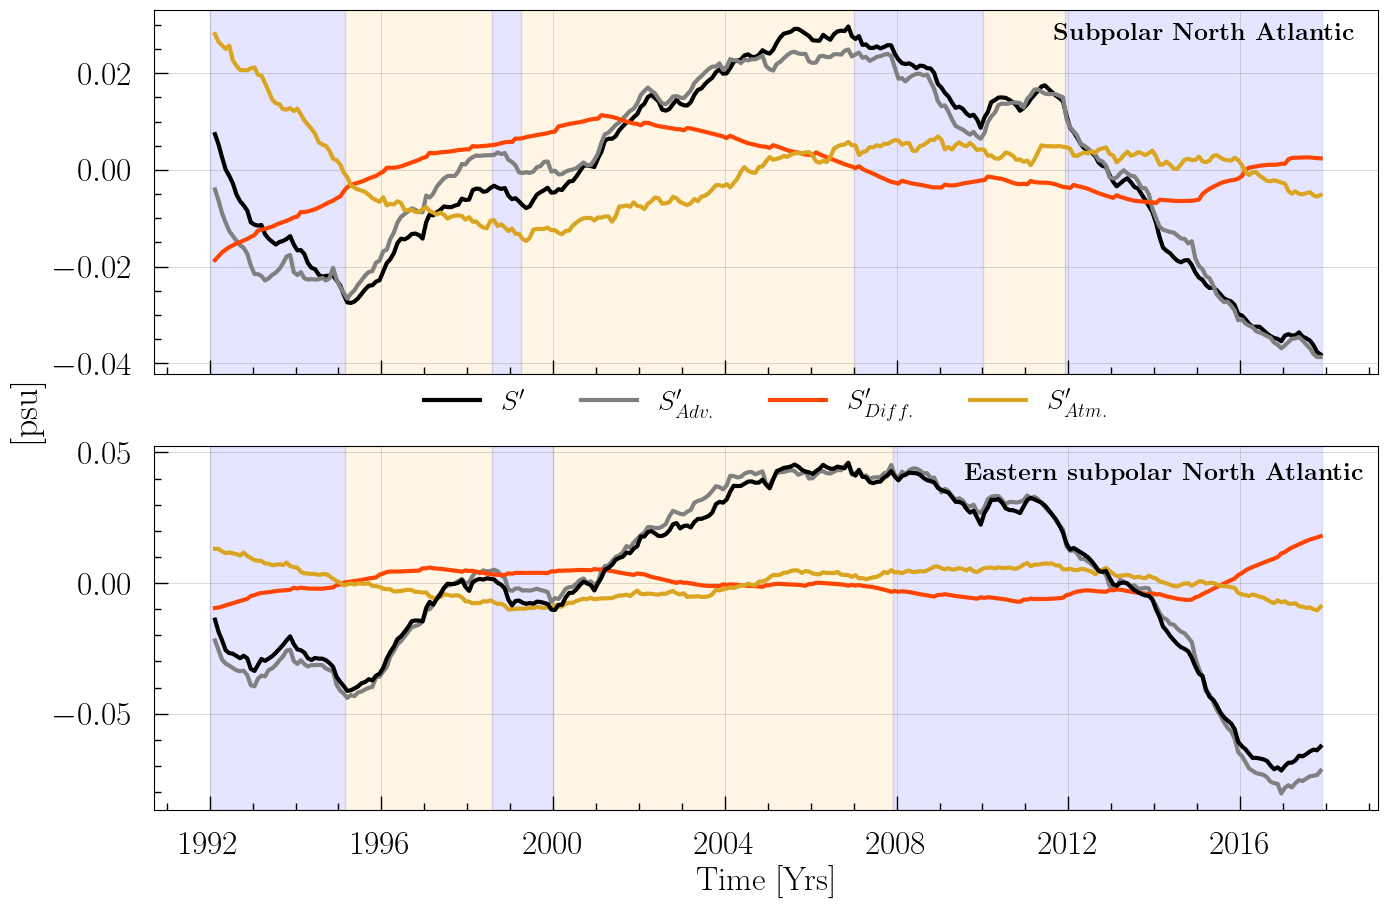

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ecco_SPNA_sal.time, ecco_SPNA_sal1000['__xarray_dataarray_variable__'],color='k', linewidth=3, label='$S^\prime$')
axs[0].plot(ds_SPNA_anom.S_adv.time, (ds_SPNA_anom1000.adv/SPNA1000_vol-
                                      ds_vol_anom_SPNA1000.V_adv*SPNA1000_sal/SPNA1000_vol), 'grey',linewidth=3 ,label='$S^\prime _{Adv.}$')
axs[0].plot(ds_SPNA_anom.S_adv.time, ( ds_SPNA_anom1000.dif/SPNA1000_vol
                                      ), 'orangered',linewidth=3 ,label='$S^\prime _{Diff.}$')
axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, -ds_vol_anom_SPNA1000.V_frc*SPNA1000_sal/SPNA1000_vol, 'goldenrod',linewidth=3 ,label='$S^\prime _{Atm.}$')
# axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, (ds_SPNA_anom.S_adv/SPNA200_vol+
#                                       ds_SPNA_anom.S_dif/SPNA200_vol-
#                                       ds_vol_anom_SPNA200.V_adv*SPNA200_sal/SPNA200_vol)
#                                     -ds_vol_anom_SPNA200.V_frc*SPNA200_sal/SPNA200_vol,
#                                     'b',linewidth=3 ,label='$\Delta S sum$')


#plt.ylim([-0.8,0.8])
axs[0].legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'[psu]', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom1000.adv/IB1000_vol  -
                                      ds_vol_anom_IB1000.V_adv*IB1000_sal/IB1000_vol), 'grey',linewidth=3 ,label='$\Delta_{S_{Adv.}}$')
axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom1000.dif/IB1000_vol), 'orangered',linewidth=3 ,label='$\Delta_{S_{Diff.}}$')
axs[1].plot(ds_vol_anom_IB200.V_frc.time, -ds_vol_anom_IB1000.V_frc*IB1000_sal/IB1000_vol, 'goldenrod',linewidth=3 ,label='salinity change due to P-E')
# axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, 'k', linewidth=3 ,label='dS')
# axs[1].plot(ds_iceland_anom.time, (ds_iceland_anom.S_adv/IB200_vol+
#                                       ds_iceland_anom.S_dif/IB200_vol-
#                                       ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol)
#                                         -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol,
#                                         'b', linewidth=3 ,label='$\Delta S sum$')
axs[1].plot(ecco_sal.time, ecco_salb1000['__xarray_dataarray_variable__'],color='k', linewidth=3, label='dS ')

#axs[1].set_ylim([-0.5,0.5])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
# plt.ylim(-0.2,0.2)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
# plt.figtext(0.65,0.8, r'1000 m', fontsize=18)
# plt.figtext(0.65,0.40, r'1000 m', fontsize=18)
plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-03',color='blue',alpha=0.1)
axs[0].axvspan(xmin='1995-03',xmax='1998-08',color='orange',alpha=0.1)
axs[0].axvspan(xmin='1998-08',xmax='1999-04',color='blue',alpha=0.1)
axs[0].axvspan(xmin='1999-04',xmax='2007-01',color='orange',alpha=0.1)
axs[0].axvspan(xmin='2007-01',xmax='2010-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2010-01',xmax='2011-12',color='orange',alpha=0.1)
axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)


axs[1].axvspan(xmin='1992-01',xmax='1995-03',color='blue',alpha=0.1)
axs[1].axvspan(xmin='1995-03',xmax='1998-08',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1998-08',xmax='2000-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2007-12',color='orange',alpha=0.1)
axs[1].axvspan(xmin='2007-12',xmax='2017-12',color='blue',alpha=0.1)

plt.savefig('figs/Fig_11.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)


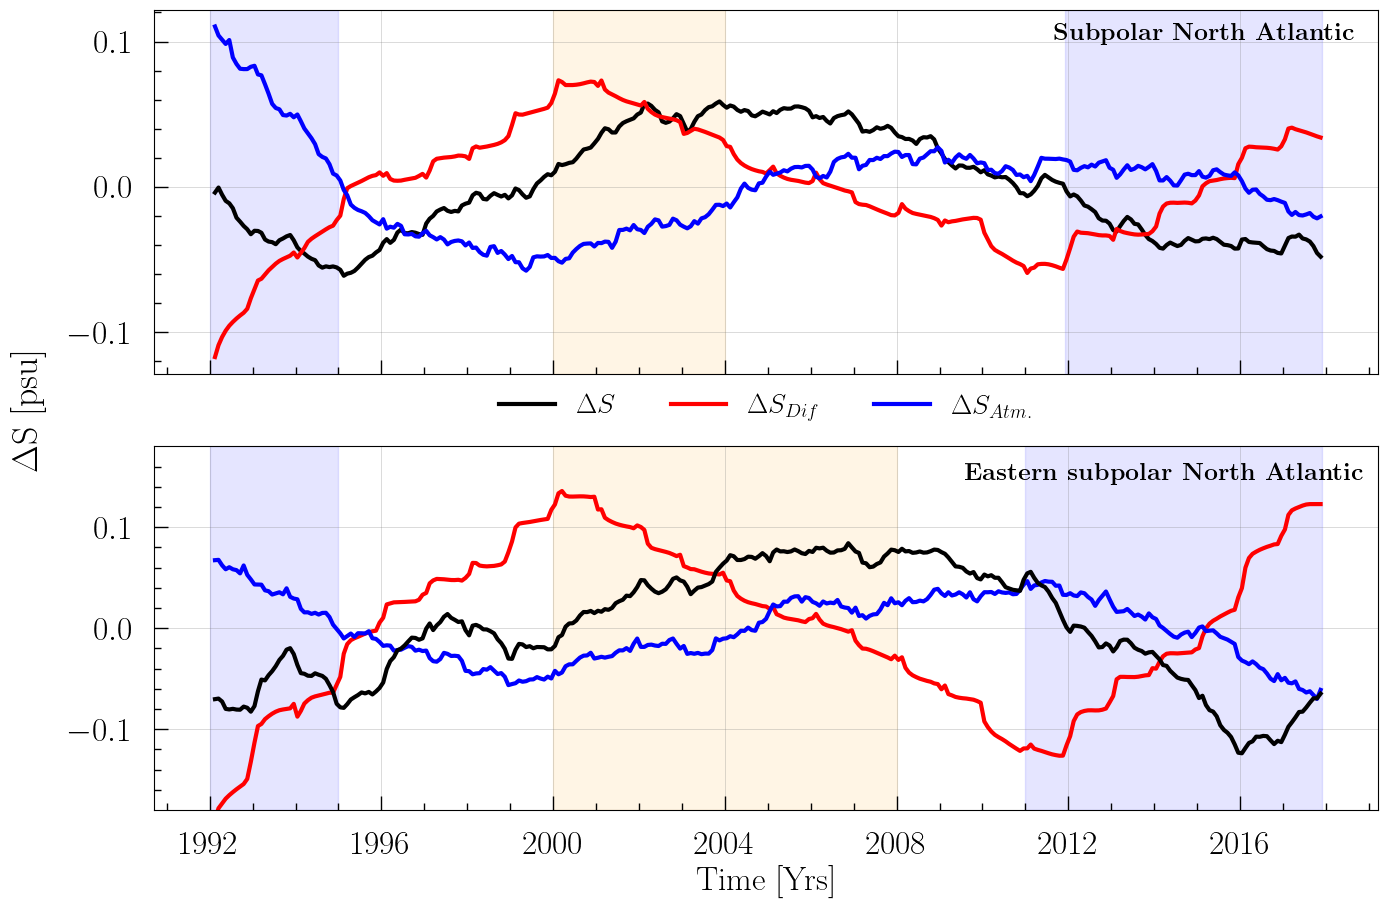

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ecco_SPNA_sal.time, ecco_SPNA_sal['__xarray_dataarray_variable__'],color='k', linewidth=3, label='$\Delta S$')
axs[0].plot(ds_SPNA_anom.S_adv.time, ( ds_SPNA_anom.S_dif/SPNA200_vol
                                      ), 'r',linewidth=3 ,label='$\Delta S_{Dif}$')
axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, -ds_vol_anom_SPNA200.V_frc*SPNA200_sal/SPNA200_vol, 'b',linewidth=3 ,label='$\Delta S_{Atm.}$')
# axs[0].plot(ds_vol_anom_SPNA200.V_frc.time, (ds_SPNA_anom.S_adv/SPNA200_vol+
#                                       ds_SPNA_anom.S_dif/SPNA200_vol-
#                                       ds_vol_anom_SPNA200.V_adv*SPNA200_sal/SPNA200_vol)
#                                     -ds_vol_anom_SPNA200.V_frc*SPNA200_sal/SPNA200_vol,
#                                     'b',linewidth=3 ,label='$\Delta S sum$')


#plt.ylim([-0.8,0.8])
axs[0].legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'$\Delta$S [psu]', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom.S_dif/IB200_vol), 'r',linewidth=3 ,label='$\Delta_{S_{Dif}}$')
axs[1].plot(ds_vol_anom_IB200.V_frc.time, -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol, 'b',linewidth=3 ,label='salinity change due to P-E')
# axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, 'k', linewidth=3 ,label='dS')
# axs[1].plot(ds_iceland_anom.time, (ds_iceland_anom.S_adv/IB200_vol+
#                                       ds_iceland_anom.S_dif/IB200_vol-
#                                       ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol)
#                                         -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol,
#                                         'b', linewidth=3 ,label='$\Delta S sum$')
axs[1].plot(ecco_sal.time, ecco_salb['__xarray_dataarray_variable__'],color='k', linewidth=3, label='dS ')

#axs[1].set_ylim([-0.5,0.5])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
#axs[1].legend(loc='upper left',bbox_to_anchor=(0.99, 0.8),frameon=False,fontsize=18)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

#axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
axs[1].set_xlabel('Time [Yrs]')
plt.ylim(-0.18,0.18)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')

plt.figtext(0.6,0.87, r'\textbf{Subpolar North Atlantic}', fontsize=18)
plt.figtext(0.55,0.43, r'\textbf{Eastern subpolar  North Atlantic}', fontsize=18)

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2011-01',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)

plt.savefig('figs/review_response_diff_P_E.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)


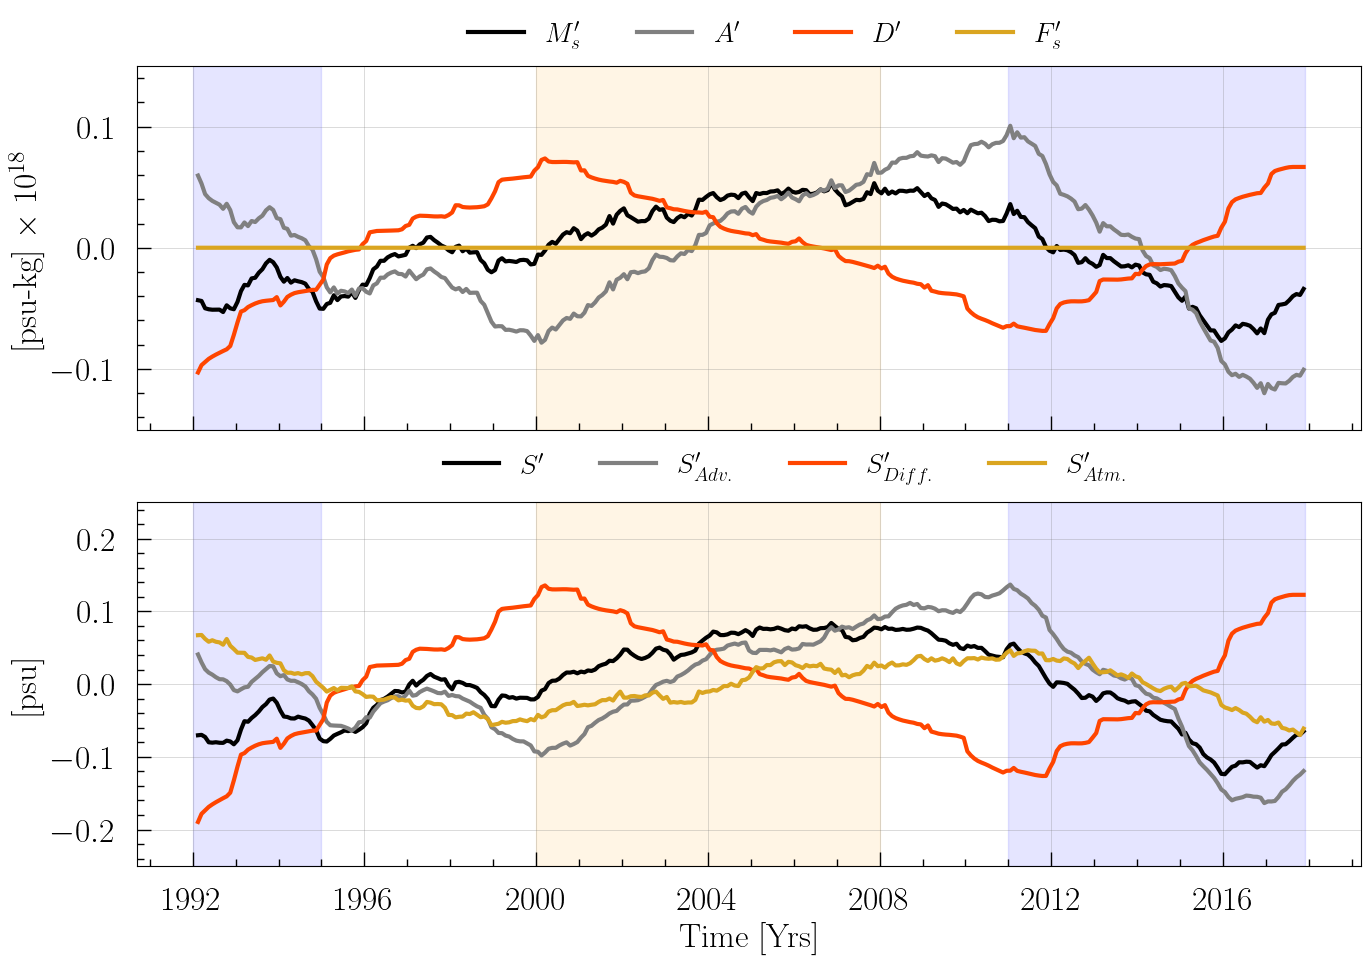

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18,10))

axs = axs.flatten()


axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
axs[0].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, lw=3, color='black',label=r'$M_s^\prime$')
axs[0].plot(ds_iceland_anom.time, ds_iceland_anom.S_adv*1e-18, lw=3, color='grey',label=r'$A^\prime$')
axs[0].plot(ds_iceland_anom.time, ds_iceland_anom.S_dif*1e-18, lw=3, color='orangered',label=r'$D^\prime$')
axs[0].plot(ds_iceland_anom.time, ds_iceland_anom.S_frc*1e-18, lw=3, color='goldenrod',label=r'$F^\prime _s$')
#axs[0].plot(ds_salt_anom_65_200.time, ds_salt_anom_65_200.__xarray_dataarray_variable__*1e-12, lw=3, color='blue',label=r'65$^{\circ}$N Advection')


axs[0].set_ylim([-0.15,0.15])
axs[0].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.25, 0.98),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$')
#axs[0].set_xlabel('Time [Yrs]')
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
#axs[0].set_xticks([])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')

axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
axs[1].plot(ecco_sal.time, ecco_salb['__xarray_dataarray_variable__'],color='k', linewidth=3, label='$S^\prime$ ')
axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom.S_adv/IB200_vol  -
                                      ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol), 'grey',linewidth=3 ,label='$S^\prime _{Adv.}$')
axs[1].plot(ds_iceland_anom.S_adv.time, (ds_iceland_anom.S_dif/IB200_vol), 'orangered',linewidth=3 ,label='$S^\prime _{Diff.}$')
axs[1].plot(ds_vol_anom_IB200.V_frc.time, -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol, 'goldenrod',linewidth=3 ,label='$S^\prime _{Atm.}$')
# axs[1].plot(ds_iceland_anom.time, ds_iceland_anom.S_tnd*1e-18, 'k', linewidth=3 ,label='dS')
# axs[1].plot(ds_iceland_anom.time, (ds_iceland_anom.S_adv/IB200_vol+
#                                       ds_iceland_anom.S_dif/IB200_vol-
#                                       ds_vol_anom_IB200.V_adv*IB200_sal/IB200_vol)
#                                         -ds_vol_anom_IB200.V_frc*IB200_sal/IB200_vol,
#                                         'b', linewidth=3 ,label='$\Delta S sum$')

#axs[1].set_ylim([-0.5,0.5])
#plt.yticks(np.arange(-1.2,1.8,0.6),fontsize=18)
axs[1].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.23, 0.98),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

axs[1].set_ylabel(r'[psu]')
axs[1].set_xlabel('Time [Yrs]')
axs[1].set_ylim(-0.25,0.25)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')


axs[1].axvspan(xmin='2011-01',xmax='2017-12',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

axs[0].axvspan(xmin='2011-01',xmax='2017-12',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2008-01',color='orange',alpha=0.1)
axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)

plt.savefig('figs/Fig_13.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)
